## Load libraries

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
%load_ext IPython.extensions.autoreload
%autoreload 2

import hypyp.fnirs as fnirs
from hypyp.wavelet import ComplexMorletWavelet, ComplexGaussianWavelet

The IPython.extensions.autoreload extension is already loaded. To reload it, use:
  %reload_ext IPython.extensions.autoreload


## Download and load raw data from disk

To use as example, we download the dataset "Dataset of parent-child hyperscanning fNIRS recordings" from https://researchdata.ntu.edu.sg/dataset.xhtml?persistentId=doi:10.21979/N9/35DNCW


In [12]:
browser = fnirs.DataBrowser()
dir = browser.download_demo_dataset()


## Lag comparison for different wavelets

We load a single subject file and set a single task, but starting with a lag, to create "dyads". We then compare the coherence for these lags, given a set of wavelet configurations


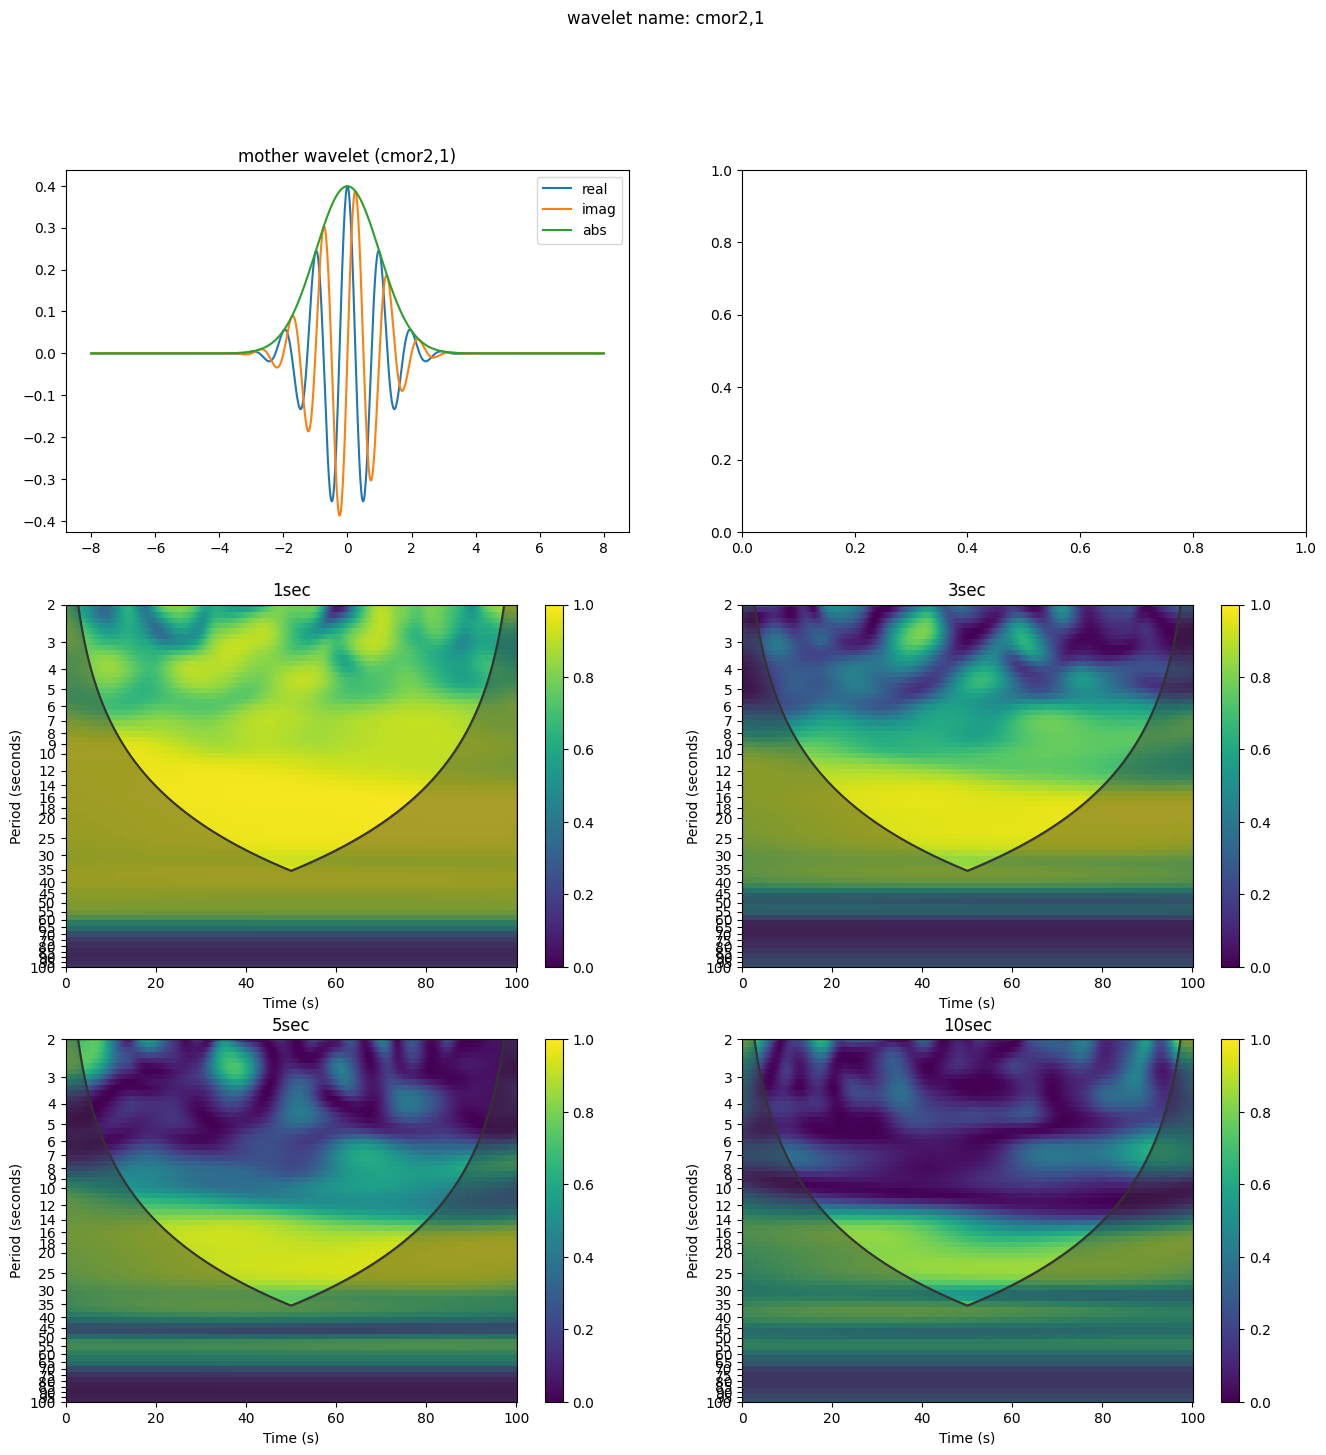

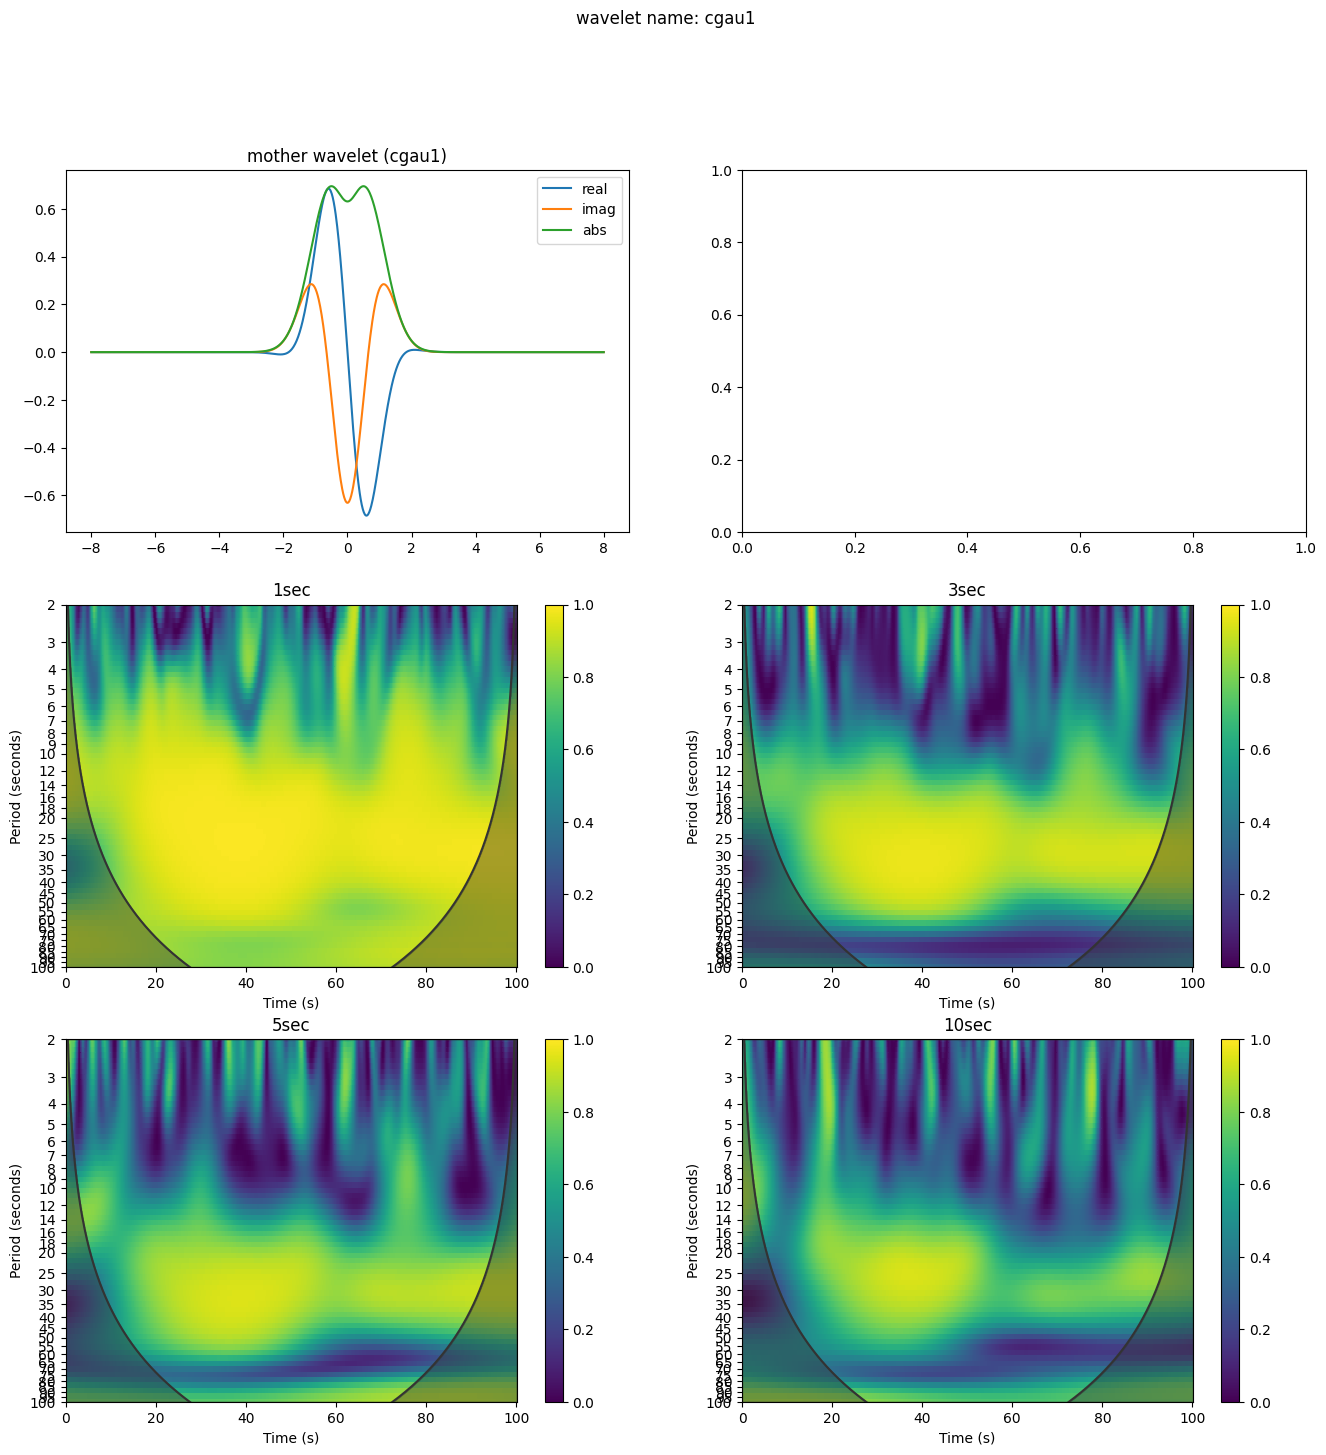

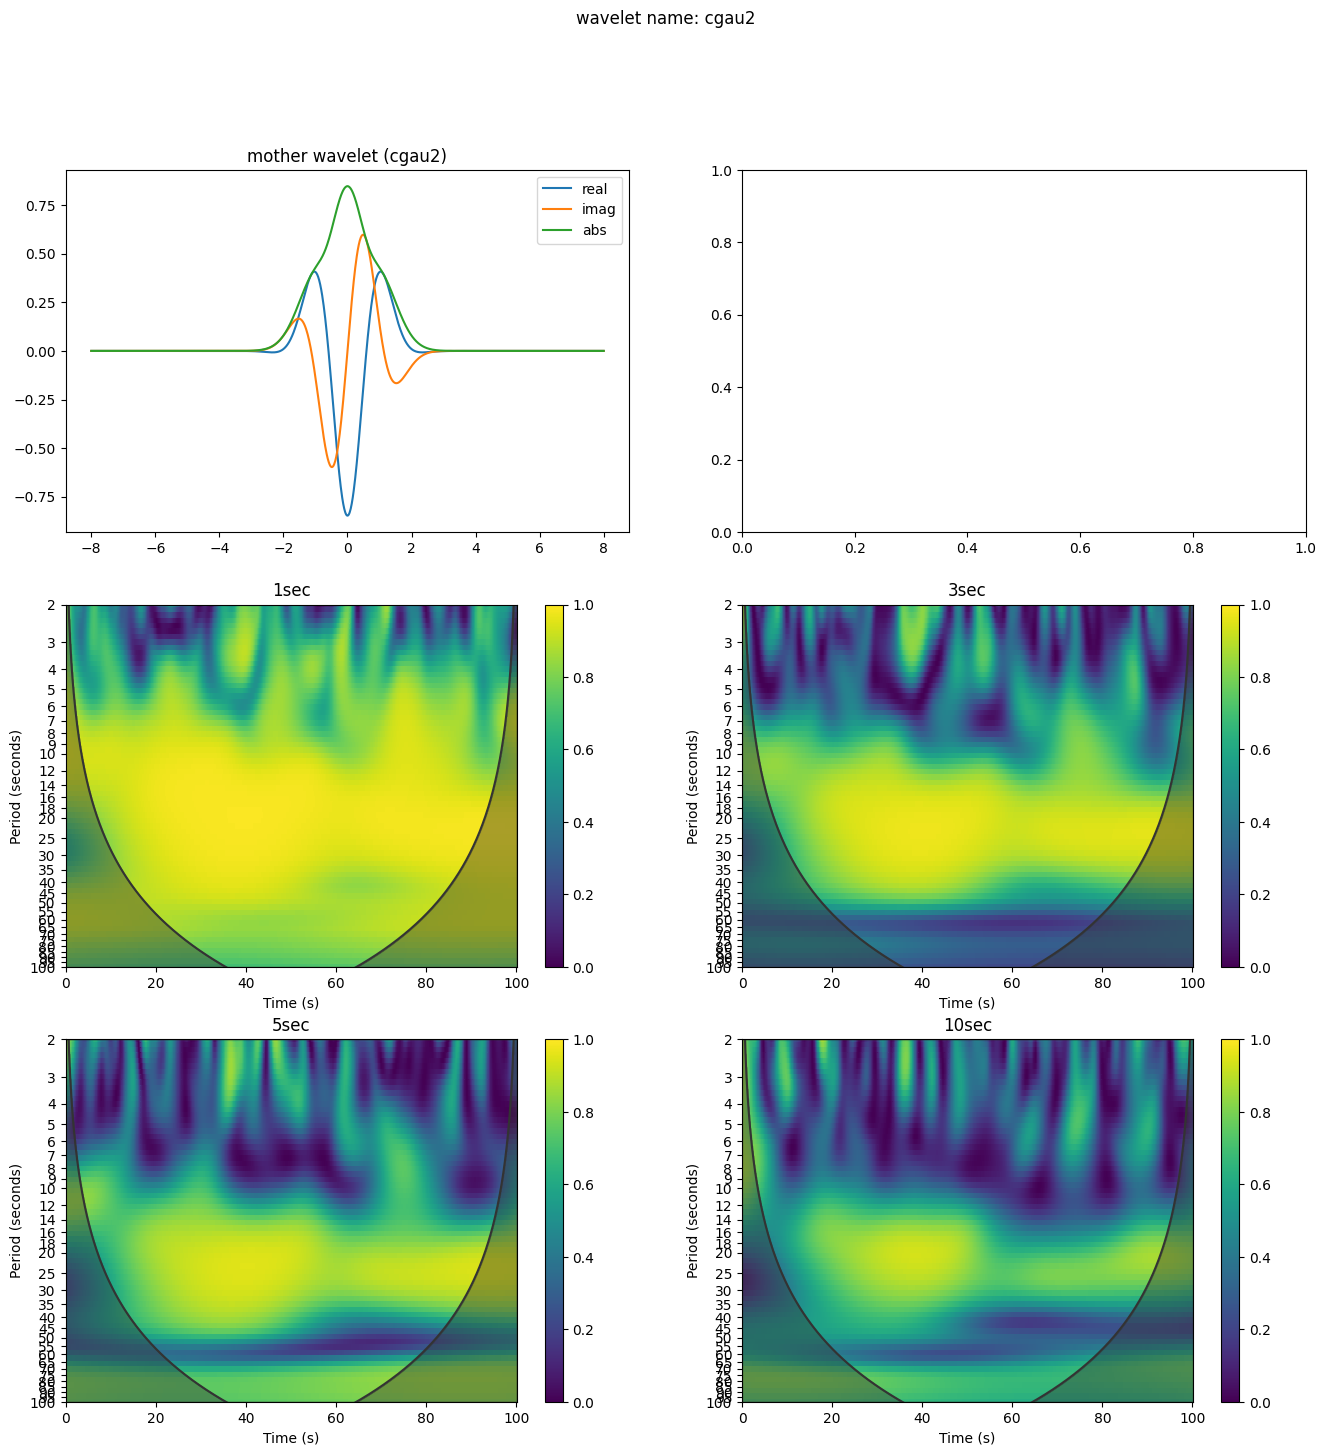

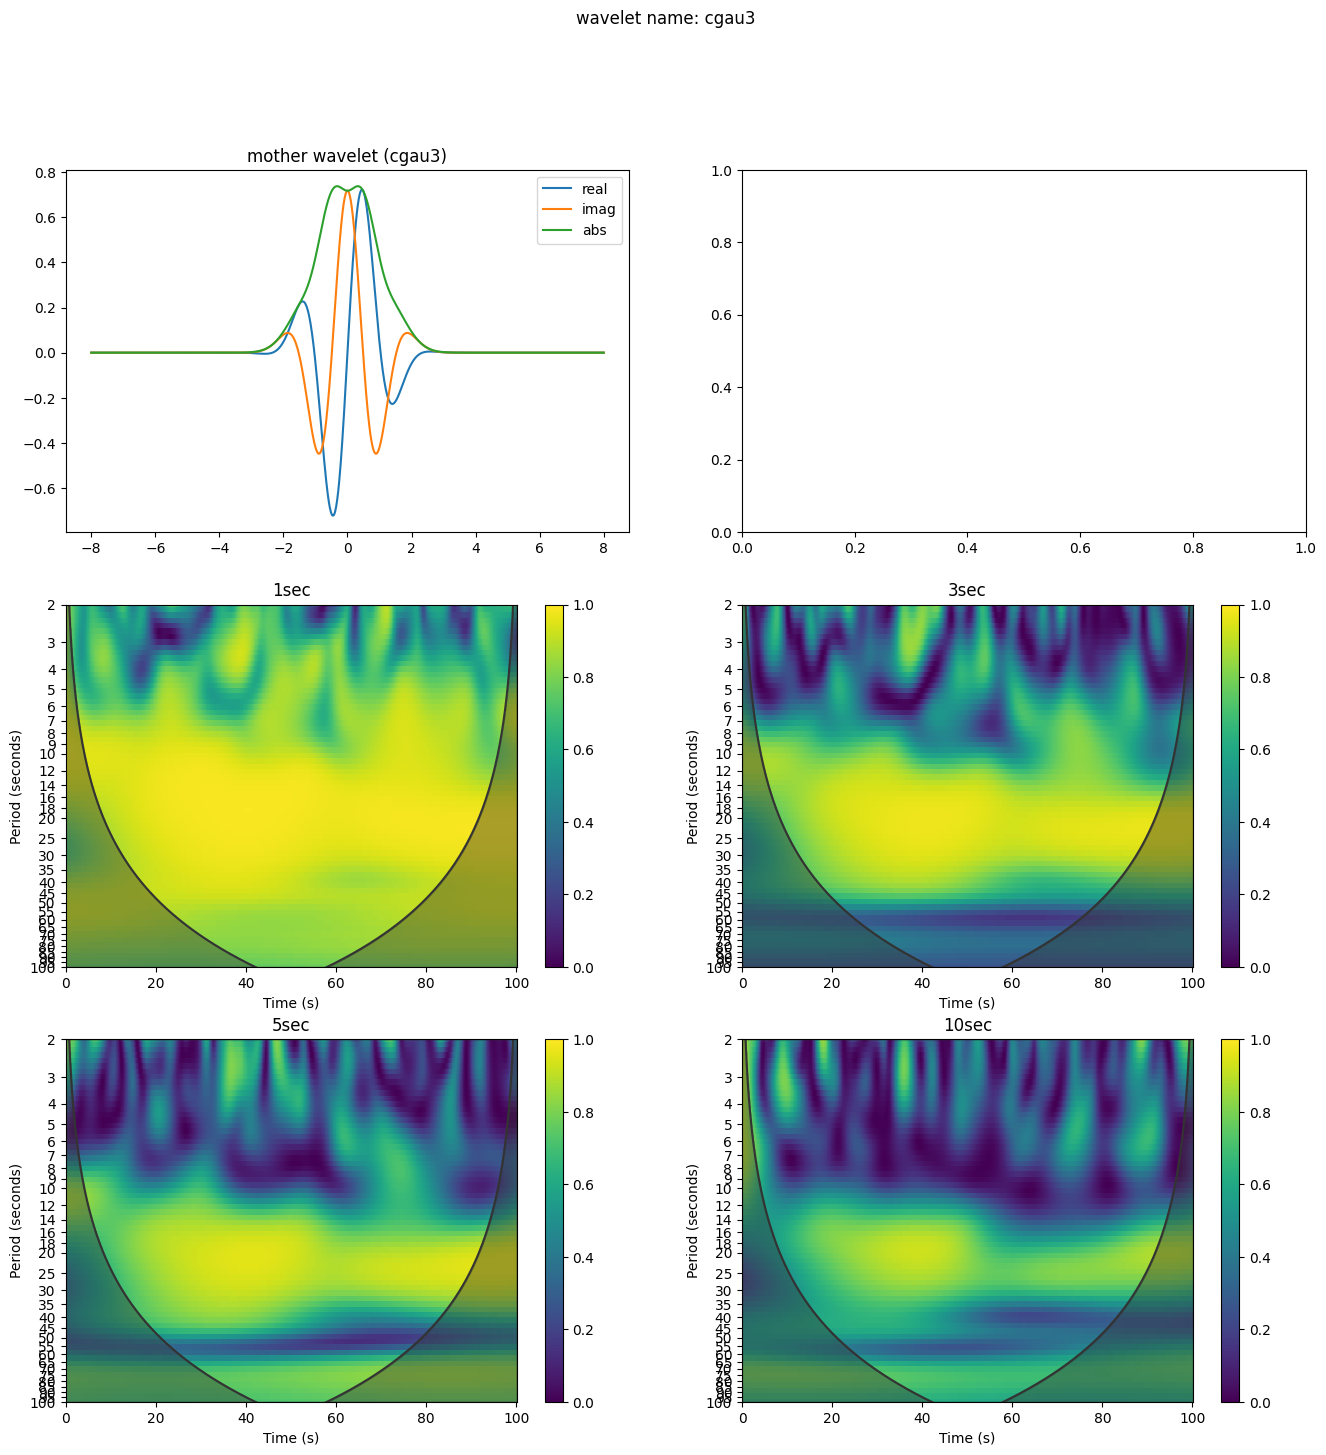

In [13]:

my_file = '../data/fNIRS/downloads/fathers/FCS01/parent/NIRS-2019-09-28_002.hdr'

preprocessor = fnirs.MnePreprocessorRawToHaemo()

subjects = []
dyads = []

subjects.append(fnirs.Subject(label='base', tasks_time_range=[('baseline', 0, 100)]))
subjects.append(fnirs.Subject(label='1sec', tasks_time_range=[('baseline', 1, 101)]))
subjects.append(fnirs.Subject(label='3sec', tasks_time_range=[('baseline', 3, 103)]))
subjects.append(fnirs.Subject(label='5sec', tasks_time_range=[('baseline', 5, 105)]))
subjects.append(fnirs.Subject(label='10sec', tasks_time_range=[('baseline', 10, 110)]))

for subject in subjects:
    subject.load_file(my_file, preprocessor)

for subject_with_lag in subjects[1:]:
    dyads.append(fnirs.Dyad(subjects[0], subject_with_lag, label=subject_with_lag.label))

cohort = fnirs.Cohort(dyads)

wavelets = [
    ComplexMorletWavelet(period_range=(2, 100)),
    ComplexGaussianWavelet(degree='1', period_range=(2, 100)),
    ComplexGaussianWavelet(degree='2', period_range=(2, 100)),
    ComplexGaussianWavelet(degree='3', period_range=(2, 100)),
]

for wavelet in wavelets:
    cohort.compute_wtcs(ch_match=('S1_D1 hbo', 'S1_D2 hbo'), wavelet=wavelet)

    fig, axes = plt.subplots(3, 2, figsize=(16, 16))
    fig.suptitle(f'wavelet name: {wavelet.wavelet_name_with_args}')
    wavelet.plot_mother_wavelet(ax=axes.flatten()[0])
    for i, dyad in enumerate(cohort.dyads):
        _ = dyad.wtcs[0].plot(title=dyad.label, ax=axes.flatten()[i+2])
